# X Education

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1- Loading Libraries and Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas,Matplotlib and sklearn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [3]:
#Reading data
Lead_data=pd.read_csv("Leads.csv")
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking dimensions of the dataframe
Lead_data.shape

(9240, 37)

In [5]:
#Looking ata the statistical aspect of data frame
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2 - Data Preparation

#### Converting some binary variables (Yes/No) to 0/1-As Most of the data is in yes or no convereting then into binary form.¶

In [7]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Search', 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_data[varlist] = Lead_data[varlist].apply(binary_map)

In [8]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,0,Modified


In [9]:
# Checking for null values
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Dropping Unnecesssary columns
un_nec_col=['Prospect ID','Last Activity','Last Notable Activity','Tags','Receive More Updates About Our Courses','How did you hear about X Education',
              'Update me on Supply Chain Content', 'Get updates on DM Content','What matters most to you in choosing a course',
              'I agree to pay the amount through cheque']
Lead_data.drop(un_nec_col,axis=1,inplace=True)

#### Looking at every column and handling missing values

Column: Lead Source
    
    
    
    Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.


<AxesSubplot:>

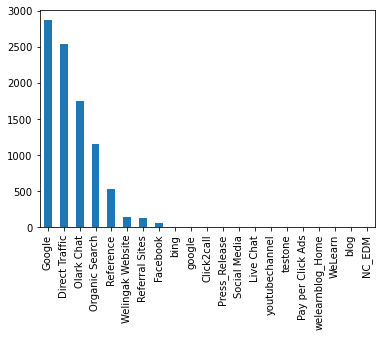

In [11]:
#Plot distribution of Lead Source

Lead_data['Lead Source'].value_counts().plot.bar()

Here the distribution shows that majorly its divided among goggle,direct traffic,olark chat so we cannot take only one for handling null values. As a result, imputing nulls with a new value "Unknown" would be the preferred null imputation method.

In [12]:
#Impute nulls with "Unknown"
Lead_data['Lead Source'] = Lead_data['Lead Source'].fillna('Unknown')

In [13]:
Lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Unknown                36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Column: TotalVisits & Page Views Per Visit

<AxesSubplot:ylabel='Frequency'>

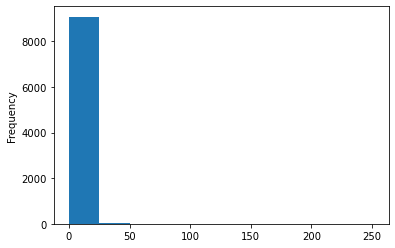

In [14]:
Lead_data['TotalVisits'].plot.hist()

Text(0.5, 1.0, 'Distribution of Page Views Per Visit')

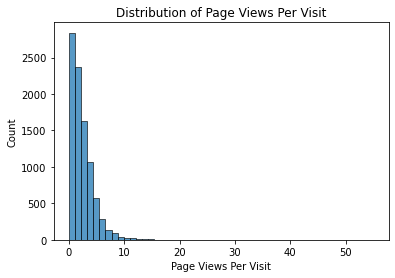

In [15]:
sns.histplot(x='Page Views Per Visit', data=Lead_data, bins=50)
plt.title("Distribution of Page Views Per Visit")

In [16]:
#The distributions for both these features is severely left-skewed, suggesting that median imputation would be best suited to handle nulls.

In [17]:
Lead_data["TotalVisits"]=Lead_data["TotalVisits"].fillna(Lead_data["TotalVisits"].median())

Lead_data["Page Views Per Visit"]=Lead_data["Page Views Per Visit"].fillna(Lead_data["Page Views Per Visit"].median())

In [18]:
Lead_data["Page Views Per Visit"].isnull().sum()

0

#### Column: Country

In [19]:
Lead_data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

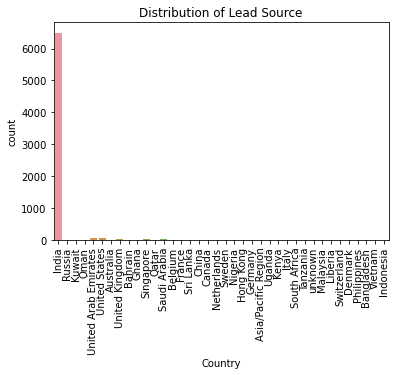

In [20]:
sns.countplot(x='Country', data=Lead_data)
plt.title('Distribution of Lead Source')
plt.xticks(rotation=90)

In [21]:
#Print the percentage of values that are null in the Country feature
print(round(Lead_data['Country'].isna().sum()*100/len(Lead_data['Country']),2),'% of values in Country are null.')

26.63 % of values in Country are null.


Text(0.5, 1.0, 'Distribution of Leads by City where Country is null')

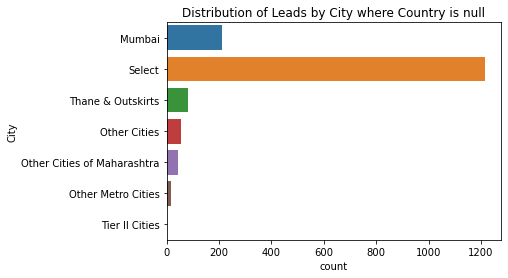

In [22]:
#Plot distribution of City where Country is null
sns.countplot(y='City', data=Lead_data[Lead_data['Country'].isna()], order = Lead_data['City'].value_counts().index)
plt.title('Distribution of Leads by City where Country is null')

In [23]:
#Impute nulls in Country based on Country
india_cities = ['Mumbai','Other Cities of Maharashtra','Thane & Outskirts']

for i in Lead_data[Lead_data['Country'].isnull()].index:
    if Lead_data.loc[i,'City'] in india_cities:
        Lead_data.loc[i,'Country'] = 'India'
    else:
        Lead_data.loc[i,'Country'] = 'Unknown'

In [24]:
#As 70 % of data is of country "India",and26 % has null values ,so Droping Country column
#In city data  more than 70% is of unknown data droping  both columns
Lead_data.drop(columns=['Country','City'], axis=1, inplace=True)

#### Column: Specialization,occupation

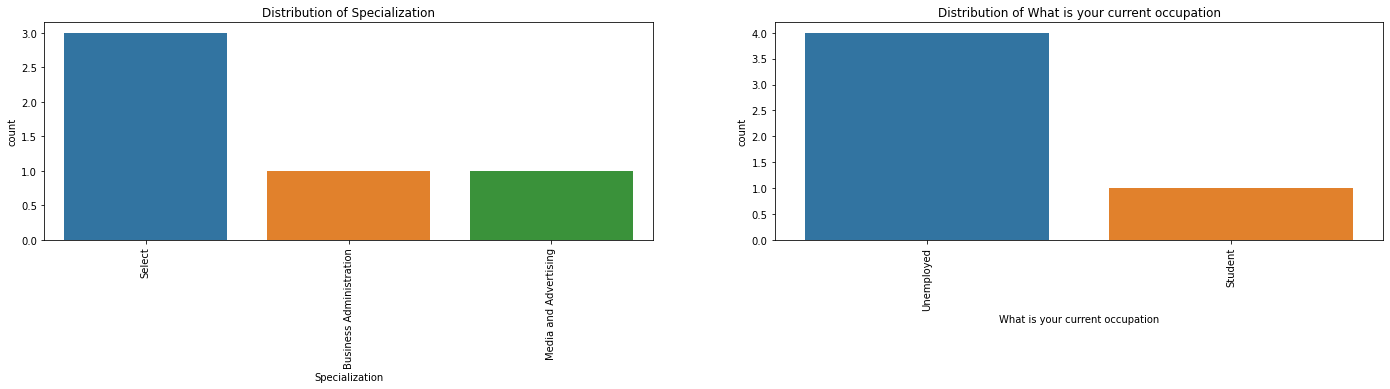

In [25]:
dropdown_fields = ['Specialization','What is your current occupation']

fig, axes = plt.subplots(nrows=1, ncols=len(dropdown_fields), figsize=(24, 4))

for i in range(len(dropdown_fields)):
    sns.countplot(x=dropdown_fields[i], data=Lead_data.head(), ax=axes[i])
    plt.sca(axes[i])
    plt.title("Distribution of " + dropdown_fields[i])
    plt.xticks(rotation=90)

In [26]:
for c in dropdown_fields:
    Lead_data[c].fillna('Unknown', inplace=True)

In [27]:
stats_AS = pd.DataFrame(
    {'Asymmetrique Activity Score':Lead_data['Asymmetrique Activity Score'].describe(),
    'Asymmetrique Profile Score':Lead_data['Asymmetrique Profile Score'].describe()})
stats_AS

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


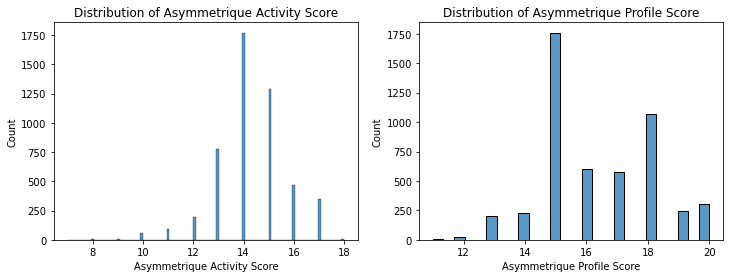

In [28]:
#Plot distribution of Asymmetrique Activity Score & Asymmetrique Profile Score
score_fields = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

fig, axes = plt.subplots(nrows=1, ncols=len(score_fields), figsize=(12, 4))

for i in range(len(score_fields)):
    sns.histplot(x=score_fields[i], data=Lead_data, ax=axes[i])       
    plt.sca(axes[i])
    plt.title("Distribution of " + score_fields[i])

In [29]:
#Impute nulls with median
for f in score_fields:
    Lead_data[f].fillna(Lead_data[f].median(), inplace=True)

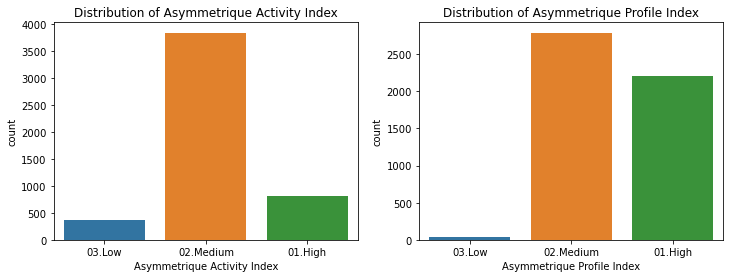

In [30]:
#Plot distribution of Asymmetrique Activity Index & Asymmetrique Profile Index
index_fields = ['Asymmetrique Activity Index','Asymmetrique Profile Index']

fig, axes = plt.subplots(nrows=1, ncols=len(index_fields), figsize=(12, 4))

for i in range(len(index_fields)):
    sns.countplot(x=index_fields[i], data=Lead_data, ax=axes[i], order=['03.Low','02.Medium','01.High'])       
    plt.sca(axes[i])
    plt.title("Distribution of " + index_fields[i])

In [31]:
#Group by Asymmetrique Activity Index
grouped_by_activity_index = Lead_data.groupby('Asymmetrique Activity Index').agg({'Asymmetrique Activity Score':'mean'})
grouped_by_activity_index

,Asymmetrique Activity Score
Asymmetrique Activity Index,
01.High,16.437272
02.Medium,14.134931
03.Low,11.290055


In [32]:
#Group by Asymmetrique Profile Index
grouped_by_profile_index = Lead_data.groupby('Asymmetrique Profile Index').agg({'Asymmetrique Profile Score':'mean'})
grouped_by_profile_index

,Asymmetrique Profile Score
Asymmetrique Profile Index,
01.High,18.128007
02.Medium,14.987446
03.Low,11.709677


In [33]:
#Drop Asymmetrique Index columns
Lead_data.drop(columns=['Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1, inplace=True)

In [34]:
Lead_data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [35]:
Lead_data["Lead Profile"].fillna('Select', inplace=True)

In [36]:
Lead_data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [37]:
Lead_data["Lead Quality"].fillna('Select', inplace=True)

In [38]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Do Not Call                             9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

# Step 2-EDA

At this step we are performing the Exploratory data analysis for the given lead data to understand data and get more usefull insights.

<AxesSubplot:>

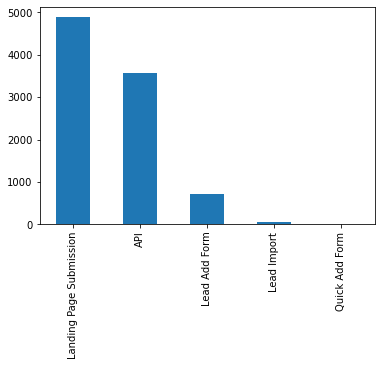

In [39]:
Lead_data['Lead Origin'].value_counts().plot.bar()

Lead origin refers to The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc. The above visualisations shows that the leads are landed in page submission than other forms of origin

<AxesSubplot:>

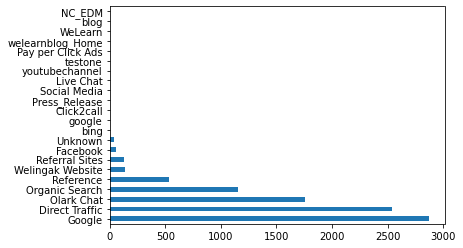

In [40]:
Lead_data['Lead Source'].value_counts().plot.barh()

Lead Scource refers to the source of leads comming in  the visualisations has that the Google to be the most form of source

<AxesSubplot:>

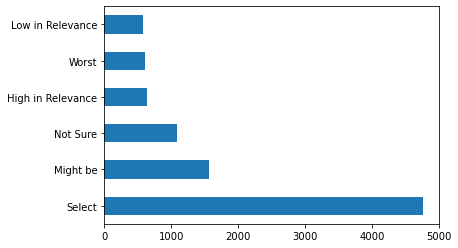

In [41]:
Lead_data['Lead Quality'].value_counts().plot.barh()

Lead qualityIndicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. here the quality of the leads are mostly unknon and not sure about it

<AxesSubplot:>

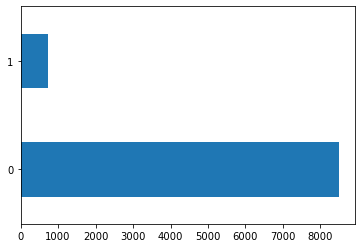

In [42]:
Lead_data['Do Not Email'].value_counts().plot.barh()

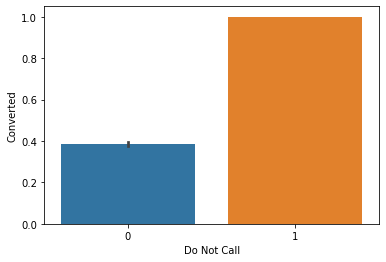

In [45]:
sns.barplot(x='Do Not Call',y='Converted',data =Lead_data)
plt.show()

<AxesSubplot:>

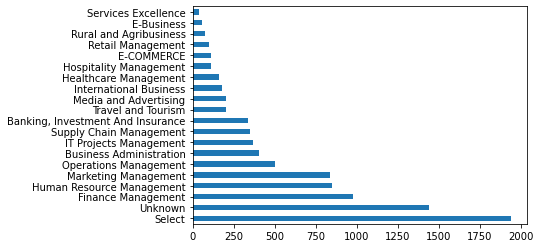

In [46]:
Lead_data['Specialization'].value_counts().plot.barh()

<AxesSubplot:>

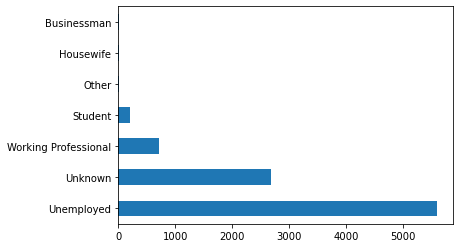

In [47]:
Lead_data['What is your current occupation'].value_counts().plot.barh()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Working Professional'),
  Text(4, 0, 'Businessman'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Housewife')])

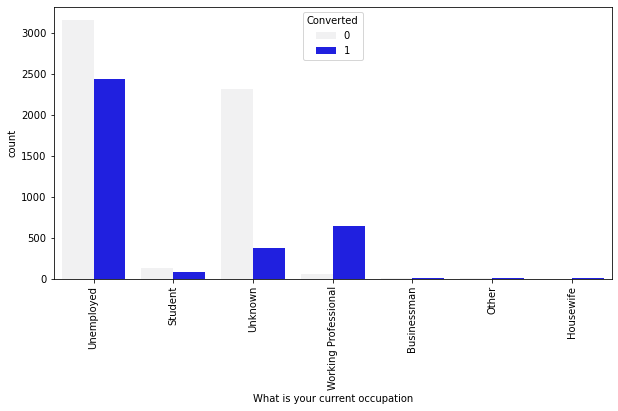

In [48]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_data,color='b')
plt.xticks(rotation = 90)

The occupation wise leads are which are converted are from unemployed which indirectly mean the people who are unemployed they are taking the x education courses to improve skills,the above data also says the conversion rate of unemployed is more than compared to other professions.

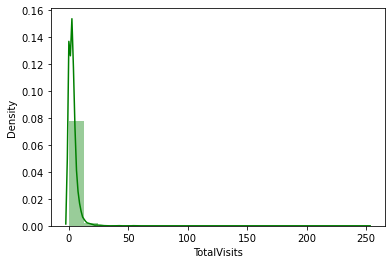

In [49]:
sns.distplot(Lead_data.TotalVisits,bins=20,color='g')
plt.show()

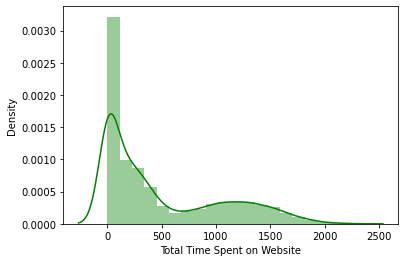

In [50]:
sns.distplot(Lead_data['Total Time Spent on Website'],bins=20,color='g')
plt.show()

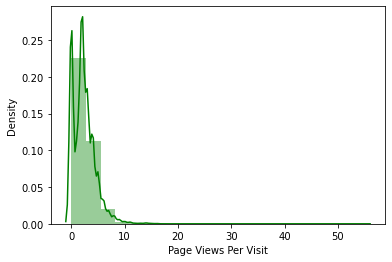

In [137]:
sns.distplot(Lead_data['Page Views Per Visit'],bins=20,color='g')
plt.show()

#### many columns are not adding any information to the model, hence we can drop them for frther analysis

In [51]:
Lead_data=Lead_data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],1)

## Step 3 -Creating Dummies

In [52]:
cols=['Lead Origin','Lead Source','Specialization','What is your current occupation','Lead Profile','Lead Quality']
dummies=pd.get_dummies(Lead_data[cols],drop_first=True)
leads_data1=pd.concat([Lead_data,dummies],axis=1)

In [53]:
leads_data1=leads_data1.drop(cols,axis=1)

In [54]:
leads_data1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Select,Lead Quality_Worst
0,660737,0,0,0,0.0,0,0.0,15.0,15.0,0,...,0,0,0,1,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,15.0,15.0,0,...,0,0,0,1,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,2.0,14.0,20.0,1,...,0,0,1,0,0,0,1,0,0,0
3,660719,0,0,0,1.0,305,1.0,13.0,17.0,1,...,0,0,0,1,0,0,0,1,0,0
4,660681,0,0,1,2.0,1428,1.0,15.0,18.0,1,...,0,0,0,1,0,0,1,0,0,0


In [55]:
leads_data1.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Select,Lead Quality_Worst
0,660737,0,0,0,0.0,0,0.0,15.0,15.0,0,...,0,0,0,1,0,1,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,15.0,15.0,0,...,0,0,0,1,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,2.0,14.0,20.0,1,...,0,0,1,0,0,0,1,0,0,0
3,660719,0,0,0,1.0,305,1.0,13.0,17.0,1,...,0,0,0,1,0,0,0,1,0,0
4,660681,0,0,1,2.0,1428,1.0,15.0,18.0,1,...,0,0,0,1,0,0,1,0,0,0


## Step 4 -Test-Train Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Putting feature variable to X
X = leads_data1.drop(['Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Select,Lead Quality_Worst
0,0,0,0.0,0,0.0,15.0,15.0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,5.0,674,2.5,15.0,15.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,14.0,20.0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,13.0,17.0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,15.0,18.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [58]:
# Putting response variable to y
y =leads_data1 ['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Select,Lead Quality_Worst
1871,0,0,-0.656434,-0.885371,-1.085519,15.0,15.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6795,0,0,0.100767,0.005716,-0.470569,14.0,16.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3516,0,0,0.290067,-0.691418,0.070401,14.0,16.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8105,0,0,0.290067,1.365219,1.226321,14.0,15.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3934,0,0,-0.656434,-0.885371,-1.085519,14.0,16.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [61]:
# Checking the Churn Rate
Converted = (sum(leads_data1['Converted'])/len(leads_data1['Converted'].index))*100
Converted

38.53896103896104

## Step 6 - Model Building

##### Running Your First Training Model

In [62]:
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2287.0
Date:                Sat, 25 Feb 2023   Deviance:                       4574.0
Time:                        18:30:27   Pearson chi2:                 6.88e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4632
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   14.2147   2.67e+04      0.001      1.000   -5.24e+04    5.24e+04
Do Not Email                                            -1.0461      0.181     -5.766      0.000      -1.402      -0.691
Do Not Call                                             22.6183   8.56e+04      0.000      1.000   -1.68e+05    1.68e+05
TotalVisits                                              0.0857      0.037      2.348      0.019       0.014       0.157
Total Time Spent on Website                              1.0612      0.044     24.279      0.000       0.976       1.147
Page Views Per Visit                                    -0.1003      0.054     -1.872      0.061      -0.205       0.005
Asymmetrique Activity Score                              0.4863      0.042     11.599      0.000       0.404       0.568
Asymmetrique Profile Score                               0.0040      0.043      0.094      0.925      -0.080       0.088
Lead Origin_Landing Page Submission                     -0.4483      0.167     -2.689      0.007      -0.775      -0.122
Lead Origin_Lead Add Form                                1.1879      1.573      0.755      0.450      -1.896       4.272
Lead Origin_Lead Import                                  0.3089      1.735      0.178      0.859      -3.091       3.709
Lead Origin_Quick Add Form                              21.8252   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                               1.5183      2.027      0.749      0.454      -2.455       5.491
Lead Source_Facebook                                     0.7376      2.164      0.341      0.733      -3.504       4.979
Lead Source_Google                                       1.7528      2.025      0.865      0.387      -2.217       5.722
Lead Source_Live Chat                                   25.7509   8.08e+04      0.000      1.000   -1.58e+05    1.58e+05
Lead Source_NC_EDM                                      26.1969   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                   2.3089      2.024      1.141      0.254      -1.657       6.275
Lead Source_Organic Search                               1.6434      2.028      0.810      0.418      -2.331       5.618
Lead Source_Pay per Click Ads                          -20.7207   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Press_Release                              -22.0294   7.59e+04     -0.000      1.000   -1.49e+05    1.49e+05
Lead Source_Reference                                    2.4941      1.297      1.923      0.054      -0.048       5.036
Lead Source_Referral Sites                               0

## Step - 7 Feature Selection Using RFE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [54]:
rfe.support_

array([ True, False, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 24),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 7),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_Unknown', False, 17),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Weli

In [56]:
col = X_train.columns[rfe.support_]

In [57]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Asymmetrique Profile Score', 'Lead Origin_Quick Add Form',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Unknown',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Select',
       'Specialization_Ser

## Step -8 Analysing the statsmodel 

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2302.3
Date:                Thu, 23 Feb 2023   Deviance:                       4604.7
Time:                        11:51:16   Pearson chi2:                 7.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4607
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.0737      1.359     -4.470      0.000      -8.737      -3.410
Do Not Email                                            -0.9953      0.177     -5.636      0.000      -1.341      -0.649
Total Time Spent on Website                              1.0541      0.043     24.459      0.000       0.970       1.139
Asymmetrique Activity Score                              0.4890      0.041     11.820      0.000       0.408       0.570
Lead Origin_Landing Page Submission                     -0.5349      0.115     -4.665      0.000      -0.760      -0.310
Lead Origin_Lead Add Form                                1.3970      0.224      6.248      0.000       0.959       1.835
Lead Origin_Lead Import                                  0.6393      1.573      0.406      0.684      -2.443       3.722
Lead Source_Direct Traffic                              -0.7993      0.159     -5.013      0.000      -1.112      -0.487
Lead Source_Facebook                                    -1.8925      1.574     -1.202      0.229      -4.977       1.192
Lead Source_Google                                      -0.5934      0.135     -4.383      0.000      -0.859      -0.328
Lead Source_Organic Search                              -0.7284      0.156     -4.675      0.000      -1.034      -0.423
Lead Source_Press_Release                              -23.7840    4.5e+04     -0.001      1.000   -8.83e+04    8.82e+04
Lead Source_Referral Sites                              -1.5576      0.368     -4.236      0.000      -2.278      -0.837
Lead Source_Welingak Website                             3.5435      0.750      4.727      0.000       2.074       5.013
Lead Source_google                                     -22.6597   3.28e+04     -0.001      0.999   -6.43e+04    6.42e+04
Specialization_E-COMMERCE                                0.3652      0.314      1.163      0.245      -0.250       0.981
Specialization_Hospitality Management                   -0.9296      0.359     -2.586      0.010      -1.634      -0.225
Specialization_Retail Management                        -0.5515      0.375     -1.471      0.141      -1.286       0.183
Specialization_Rural and Agribusiness                    0.3616      0.431      0.839      0.401      -0.483       1.206
Specialization_Unknown                                  -1.3236      0.172     -7.675      0.000      -1.662      -0.986
What is your current occupation_Housewife               24.9637   2.35e+04      0.001      0.999   -4.61e+04    4.61e+04
What is your current occupation_Other                    2.5509      1.663      1.534      0.125      -0.708       5.810
What is your current occupation_Student                  3

In [59]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.276656
6795    0.147406
3516    0.239441
8105    0.835117
3934    0.204210
4844    0.983118
3297    0.100841
8071    0.997798
987     0.138926
7423    0.961247
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27665586, 0.14740648, 0.23944119, 0.83511672, 0.20420969,
       0.98311777, 0.10084122, 0.99779777, 0.13892581, 0.96124724])

Predicted vs actual

In [61]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.276656,1871
1,0,0.147406,6795
2,0,0.239441,3516
3,0,0.835117,8105
4,0,0.204210,3934


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [62]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.276656,1871,0
1,0,0.147406,6795,0
2,0,0.239441,3516,0
3,0,0.835117,8105,1
4,0,0.204210,3934,0


In [63]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3632  370]
 [ 629 1837]]


In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8455473098330241


###Manual Feature elimination through VIFs

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Asymmetrique Activity Score,172.19
22,What is your current occupation_Unemployed,122.56
23,What is your current occupation_Unknown,64.20
24,What is your current occupation_Working Profes...,17.04
5,Lead Origin_Lead Import,16.87
7,Lead Source_Facebook,16.86
31,Lead Quality_Select,14.45
26,Lead Profile_Select,8.91
21,What is your current occupation_Student,5.40
3,Lead Origin_Landing Page Submission,5.33


In [67]:
# dropping features which are high VIF
col = col.drop(['Asymmetrique Activity Score','What is your current occupation_Unknown','Lead Origin_Lead Import','Lead Source_Facebook','Lead Quality_Select','Lead Profile_Select'],1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Specialization_E-COMMERCE',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Wors

In [68]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.1
Date:                Thu, 23 Feb 2023   Deviance:                       5164.2
Time:                        11:51:46   Pearson chi2:                 7.61e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5985      0.138     -4.349      0.000      -0.868      -0.329
Do Not Email                                            -1.1808      0.171     -6.923      0.000      -1.515      -0.847
Total Time Spent on Website                              1.0622      0.040     26.383      0.000       0.983       1.141
Lead Origin_Landing Page Submission                     -0.2495      0.105     -2.387      0.017      -0.454      -0.045
Lead Origin_Lead Add Form                                2.1526      0.199     10.804      0.000       1.762       2.543
Lead Source_Direct Traffic                              -1.0279      0.146     -7.028      0.000      -1.315      -0.741
Lead Source_Google                                      -0.8042      0.123     -6.556      0.000      -1.045      -0.564
Lead Source_Organic Search                              -0.8831      0.144     -6.127      0.000      -1.166      -0.601
Lead Source_Press_Release                              -21.9863   4.68e+04     -0.000      1.000   -9.18e+04    9.18e+04
Lead Source_Referral Sites                              -1.6104      0.335     -4.802      0.000      -2.268      -0.953
Lead Source_Welingak Website                             2.3546      0.741      3.178      0.001       0.902       3.807
Lead Source_google                                     -22.9209   3.25e+04     -0.001      0.999   -6.38e+04    6.38e+04
Specialization_E-COMMERCE                                0.3315      0.286      1.159      0.246      -0.229       0.892
Specialization_Hospitality Management                   -0.8774      0.328     -2.673      0.008      -1.521      -0.234
Specialization_Retail Management                        -0.2088      0.345     -0.606      0.545      -0.884       0.467
Specialization_Rural and Agribusiness                    0.3797      0.406      0.935      0.350      -0.416       1.176
Specialization_Unknown                                  -0.7529      0.161     -4.686      0.000      -1.068      -0.438
What is your current occupation_Housewife               22.9053   2.31e+04      0.001      0.999   -4.53e+04    4.54e+04
What is your current occupation_Other                    1.1901      1.158      1.028      0.304      -1.079       3.460
What is your current occupation_Student                  1.3643      0.346      3.942      0.000       0.686       2.043
What is your current occupation_Unemployed               0.8147      0.117      6.945      0.000       0.585       1.045
What is your current occupation_Working Professional     2.7154      0.223     12.150      0.000       2.277       3.153
Lead Profile_Other Leads                                -0

In [69]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [70]:
y_train_pred[:10]

array([0.19401443, 0.25823526, 0.37327623, 0.85242172, 0.32646956,
       0.98128304, 0.11795938, 0.98186921, 0.08962608, 0.93403817])

In [71]:
y_train_pred_final['Converted_prob'] = y_train_pred

In [72]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.194014,1871,0
1,0,0.258235,6795,0
2,0,0.373276,3516,0
3,0,0.852422,8105,1
4,0,0.326470,3934,0


In [73]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8211193568336426


In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.86
4,Lead Source_Direct Traffic,4.12
19,What is your current occupation_Unemployed,3.81
5,Lead Source_Google,3.09
26,Lead Quality_Worst,2.13
6,Lead Source_Organic Search,1.84
24,Lead Quality_Might be,1.78
20,What is your current occupation_Working Profes...,1.77
22,Lead Profile_Student of SomeSchool,1.75
3,Lead Origin_Lead Add Form,1.67


In [75]:
col = col.drop(['Lead Origin_Landing Page Submission','Lead Source_Direct Traffic','Lead Quality_Worst','Lead Source_google'],1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure'],
      dtype='object')

In [76]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.2
Date:                Thu, 23 Feb 2023   Deviance:                       5396.4
Time:                        11:52:15   Pearson chi2:                 7.50e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5735      0.101    -15.520      0.000      -1.772      -1.375
Do Not Email                                            -1.3326      0.164     -8.148      0.000      -1.653      -1.012
Total Time Spent on Website                              0.9222      0.036     25.608      0.000       0.852       0.993
Lead Origin_Lead Add Form                                2.9377      0.189     15.517      0.000       2.567       3.309
Lead Source_Google                                      -0.0818      0.078     -1.046      0.296      -0.235       0.072
Lead Source_Organic Search                              -0.1816      0.108     -1.684      0.092      -0.393       0.030
Lead Source_Press_Release                              -20.0394   2.98e+04     -0.001      0.999   -5.85e+04    5.85e+04
Lead Source_Referral Sites                              -0.8377      0.316     -2.654      0.008      -1.456      -0.219
Lead Source_Welingak Website                             2.3829      0.742      3.213      0.001       0.929       3.836
Specialization_E-COMMERCE                                0.1127      0.279      0.404      0.686      -0.434       0.659
Specialization_Hospitality Management                   -0.8982      0.316     -2.843      0.004      -1.517      -0.279
Specialization_Retail Management                        -0.2901      0.328     -0.884      0.377      -0.934       0.353
Specialization_Rural and Agribusiness                    0.4007      0.388      1.032      0.302      -0.360       1.161
Specialization_Unknown                                  -0.1622      0.143     -1.136      0.256      -0.442       0.118
What is your current occupation_Housewife               21.9508   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
What is your current occupation_Other                    0.3405      0.864      0.394      0.694      -1.353       2.034
What is your current occupation_Student                  0.9964      0.294      3.388      0.001       0.420       1.573
What is your current occupation_Unemployed               0.8914      0.109      8.172      0.000       0.678       1.105
What is your current occupation_Working Professional     2.7374      0.217     12.595      0.000       2.311       3.163
Lead Profile_Other Leads                                -0.7589      0.169     -4.489      0.000      -1.090      -0.428
Lead Profile_Student of SomeSchool                      -2.5172      0.437     -5.762      0.000      -3.373      -1.661
Lead Quality_Low in Relevance                            1.8760      0.166     11.323      0.000       1.551       2.201
Lead Quality_Might be                                    1

In [77]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [78]:
y_train_pred[:10]

array([0.10635235, 0.33697081, 0.2108701 , 0.84690731, 0.18264283,
       0.98365524, 0.14603877, 0.97937794, 0.11766508, 0.90656719])

In [79]:
y_train_pred_final['Converted_prob'] = y_train_pred

In [80]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,0,0.106352,1871,0
1,0,0.336971,6795,0
2,0,0.210870,3516,0
3,0,0.846907,8105,1
4,0,0.182643,3934,0


In [81]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8126159554730983


In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,2.66
21,Lead Quality_Might be,1.71
17,What is your current occupation_Working Profes...,1.61
3,Lead Source_Google,1.56
2,Lead Origin_Lead Add Form,1.54
22,Lead Quality_Not Sure,1.39
20,Lead Quality_Low in Relevance,1.31
7,Lead Source_Welingak Website,1.25
4,Lead Source_Organic Search,1.22
15,What is your current occupation_Student,1.20


In [83]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Specialization_Unknown',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Other Leads', 'Lead Profile_Student of SomeSchool',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure'],
      dtype='object')

#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [84]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3559,  443],
       [ 769, 1697]], dtype=int64)

In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8126159554730983

### Metrics beyond simply accuracy

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6881589618815896

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.8893053473263368

In [89]:
# Calculate false postive rate - predicting converted rate when customer does not have converted
print(FP/ float(TN+FP))

0.11069465267366317


In [90]:
# positive predictive value 
print (TP / float(TP+FP))

0.7929906542056074


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8223197781885397


Precision and Recall

In [96]:
from sklearn.metrics import precision_recall_curve

In [97]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3559,  443],
       [ 769, 1697]], dtype=int64)

In [98]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7929906542056074

In [99]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6881589618815896

In [100]:
from sklearn.metrics import precision_score, recall_score

In [101]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7929906542056074

In [102]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6881589618815896

### Step 9: Plotting the ROC Curve¶

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

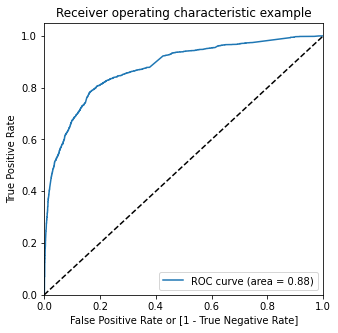

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Step 10: Finding Optimal Cutoff Point

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.106352,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.336971,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.210870,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.846907,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.182643,3934,0,1,1,0,0,0,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588899  0.965126  0.357071
0.2   0.2  0.743970  0.868613  0.667166
0.3   0.3  0.799938  0.817924  0.788856
0.4   0.4  0.815244  0.774534  0.840330
0.5   0.5  0.812616  0.688159  0.889305
0.6   0.6  0.802876  0.597729  0.929285
0.7   0.7  0.792362  0.527170  0.955772
0.8   0.8  0.775819  0.452960  0.974763
0.9   0.9  0.726036  0.297242  0.990255


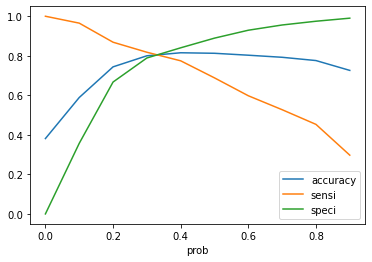

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

By this we have completed building model Logistic reg model,accuracy, precision, recall,roc curve is included.